In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

Domain Knowladge

**1. work_year [categprical] **: The year the salary was paid
**2. experience_level [categorical] **: The experience level in the job during the year
**3. employment_type [categorical]** : The type of employment for the role
**4. job_title [categorical]**: The role worked in during the year
**5. salary [numerical] **: The total gross salary amount paid
**6. salary_currency [categorical]** : The currency of the salary paid as an ISO 4217 currency code.
**7. salaryinusd [numerical]** : The salary in USD
**8. employee_residence [categorical]**: Employee's primary country of residence in during the work yearas an ISO 3166 ountry code
**9. remote_ratio [ratio]**: The overall amount of work done remotely
**10. company_location [categorical]**: The country of the employer's main office or contracting branch
**11. company_size [categorical]**: The median number of people that worked for the company during the yearas an ISO 3166 county code

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/sukma/ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


#1. Exploratory Data Analysis (EDA)

##1.1 Check Null Values

In [ ]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

##1.2 Duplicate Value

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1171, 11)


In [ ]:
#drop duplicate date
data = data.drop_duplicates()

##1.3 Unique Value in Each Column

In [ ]:
for column in data.columns:
  num_distinct_values = len(data[column].unique())
  print(f"[column]: {num_distinct_values} distinct values")

[column]: 4 distinct values
[column]: 4 distinct values
[column]: 4 distinct values
[column]: 93 distinct values
[column]: 815 distinct values
[column]: 20 distinct values
[column]: 1035 distinct values
[column]: 78 distinct values
[column]: 3 distinct values
[column]: 72 distinct values
[column]: 3 distinct values


In [ ]:
data.iloc[:, 0]. unique()

array([2023, 2022, 2020, 2021])

In [ ]:
data.iloc[:, 1]. unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [ ]:
data.iloc[:, 2]. unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [ ]:
data.iloc[:, 3]. unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
data.iloc[:, 5]. unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [ ]:
data.iloc[:, 7]. unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [ ]:
data.iloc[:, 8]. unique()

array([100,   0,  50])

In [ ]:
data.iloc[:, 9]. unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [ ]:
data.iloc[:, 10]. unique()

array(['L', 'S', 'M'], dtype=object)

##1.4 Rename the Value for better understanding

In [ ]:
data['experience_level'] = data['experience_level'].replace({})

<ipython-input-75-d8c4363b46e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience_level'] = data['experience_level'].replace({})


In [ ]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate Level'
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT': 'Full-time',
    'PT': 'Part-time'
})

data['remote_ratio'] = data['remote_ratio'].replace({
    0: 'On-Site',
    50: 'Half-Remote',
    100: 'Full-Remote'
})

<ipython-input-76-2c609fd464bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience_level'] = data['experience_level'].replace({
<ipython-input-76-2c609fd464bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['employment_type'] = data['employment_type'].replace({
<ipython-input-76-2c609fd464bc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L


##1.5 Group The Job Title

In [ ]:
print(data['job_title'].nunique())
data['job_title'].unique()

93


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
def assign_broader_category(job_title):
  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
  data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
  machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
  management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

  if job_title in data_engineering:
    return "Data Engineering"
  elif job_title in data_scientist:
    return "Data Scientist"
  elif job_title in machine_learning:
    return "Machine Learning"
  elif job_title in data_architecture:
    return "Data Architecture"
  elif job_title in management:
    return "Management"
  else:
    return "Other"

data['job_category'] = data['job_title'].apply(assign_broader_category)

<ipython-input-79-fde3f21cd67c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job_category'] = data['job_title'].apply(assign_broader_category)


In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering


##1.6 Adjust Salary to Present Value

In [ ]:
data[['work_year', 'salary_in_usd']]

NameError: ignored

In [ ]:
data[['work_year', 'salary_in_usd']]

,work_year,salary_in_usd
0,2023,85847
1,2023,30000
2,2023,25500
3,2023,175000
4,2023,120000
...,...,...
3750,2020,412000
3751,2021,151000
3752,2020,105000
3753,2020,100000


In [ ]:
def assign_broader_category(job_title):
  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
  data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
  machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
  management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

  if job_title in data_engineering:
    return "Data Engineering"
  elif job_title in data_scientist:
    return "Data Scientist"
  elif job_title in machine_learning:
    return "Machine Learning"
  elif job_title in data_architecture:
    return "Data Architecture"
  elif job_title in management:
    return "Management"
  else:
    return "Other"

data['job_category'] = data['job_title'].apply(assign_broader_category)
# Inflation rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}
global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
  year = row['work_year']
  original_salary = row['salary_in_usd']
  currency = row['salary_currency']

  if year == 2023:
    return original_salary
  else:
    adjusted_salary = original_salary

    for y in range (year, 2023):
      if currency == 'USD':
        inflation_rate = us_inflation_rates[y]
      else:
        inflation_rate = global_inflation_rates[y]

      adjusted_salary = adjusted_salary * (1 + inflation_rate)

    return adjusted_salary

<ipython-input-82-1bfd3b0c440d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job_category'] = data['job_title'].apply(assign_broader_category)


In [ ]:
data['adjusted_salary'] = data.apply(adjust_salary, axis =1)


<ipython-input-83-01054ec8bce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adjusted_salary'] = data.apply(adjust_salary, axis =1)


In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other,85847.000000
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning,30000.000000
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning,25500.000000
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist,175000.000000
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist,120000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist,465053.312718
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other,168373.305000
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist,118520.868532
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering,112877.017650


##1.7 Job Distribution

In [ ]:
data['job_category'].value_counts()

Data Engineering     1141
Data Scientist        639
Other                 398
Machine Learning      244
Management             94
Data Architecture      68
Name: job_category, dtype: int64

In [ ]:
value_counts = data['job_category'].value_counts(normalize=True) * 100
value_counts

Data Engineering     44.156347
Data Scientist       24.729102
Other                15.402477
Machine Learning      9.442724
Management            3.637771
Data Architecture     2.631579
Name: job_category, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.barh(value_counts.index, value_counts.values)
ax.set_title('Job Category Percentage')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')

plt.show()

NameError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.barh(value_counts.index, value_counts.values)
ax.set_title('Job Category Percentage')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')

plt.show()

NameError: ignored

## 1.8 Distribution across different employment types

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering


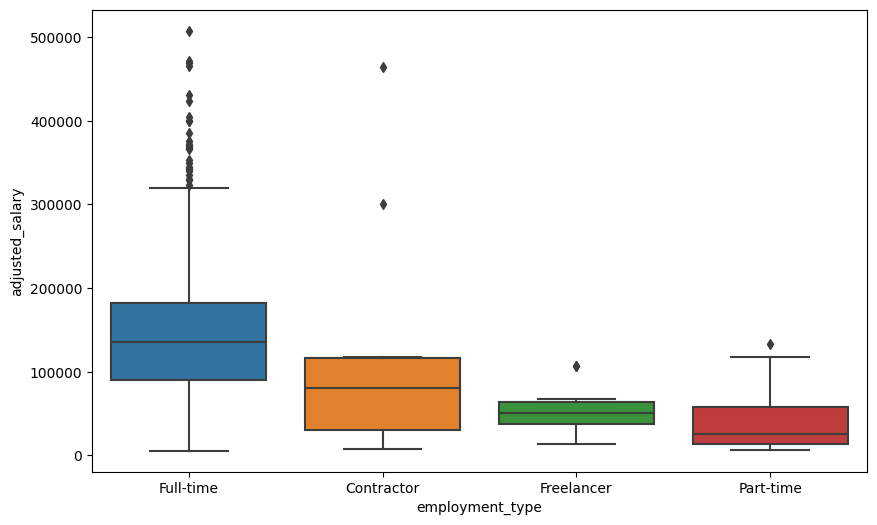

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(data=data, x='employment_type', y='adjusted_salary')

plt.show()

## 1.9 Distribution Of salaray

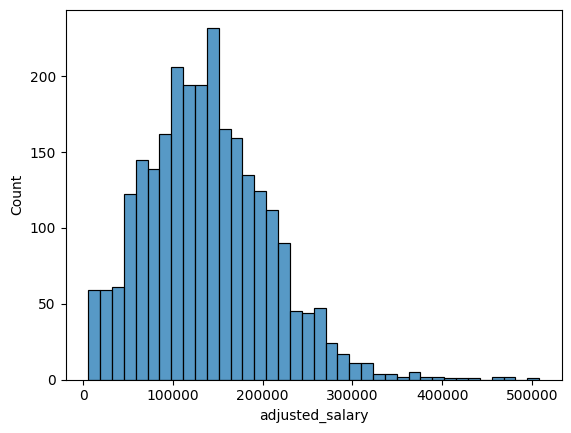

In [ ]:
sns.histplot(data['adjusted_salary'])
plt.show()

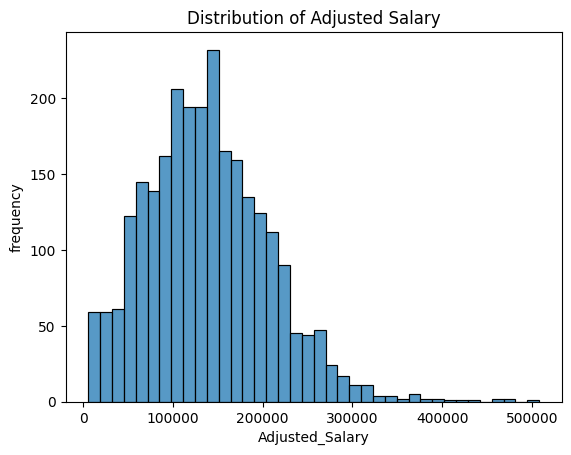

In [ ]:
sns.histplot(data['adjusted_salary'])
plt.title('Distribution of Adjusted Salary')
plt.ylabel('frequency')
plt.xlabel('Adjusted_Salary')

plt.show()

##1.10 Boxplot and Swarmplot of Adjusted Salary

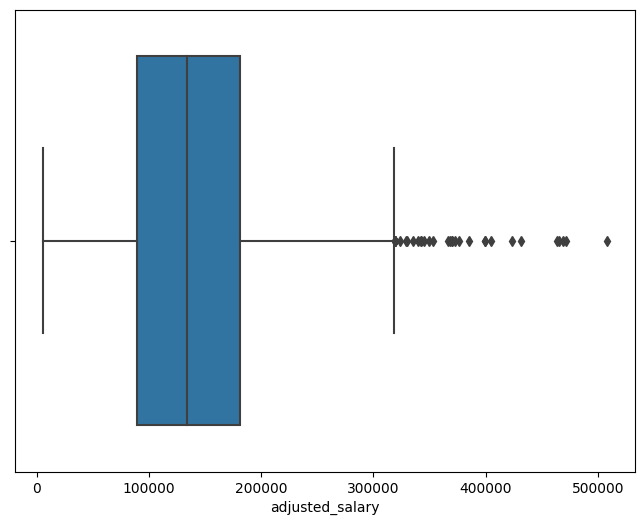

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'])

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


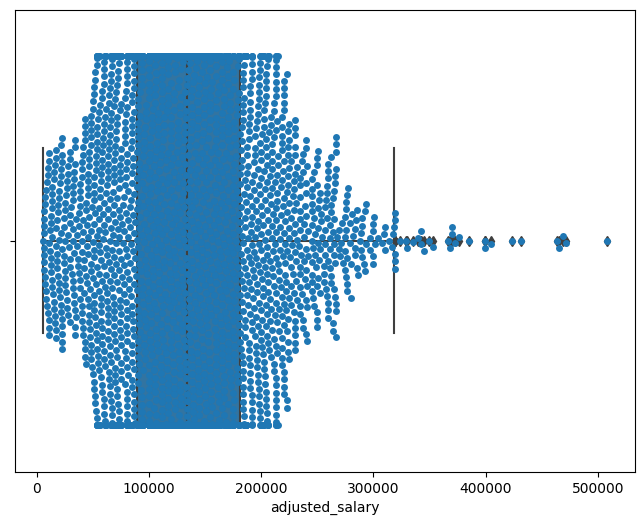

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'])
sns.swarmplot(x=data['adjusted_salary'])
plt.show()

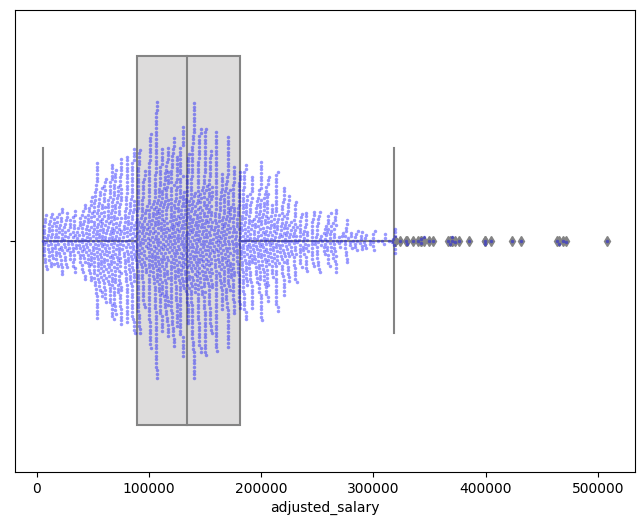

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color='blue', alpha=0.4, size=2.5)

plt.show()

In [ ]:
data['adjusted_salary'].describe()

count      2584.000000
mean     138560.259727
std       69092.951905
min        5583.616000
25%       89460.000000
50%      134318.173494
75%      181050.000000
max      507946.579425
Name: adjusted_salary, dtype: float64

#2. Answer The Quetions

## 2.1  Show the median adjusted data scientist salary, for each experience level

In [ ]:
# Show the median adjusted data scientist salary, for each experience level
print(data[data['job_title'] == 'Data Scientist'].groupby('experience_level')['salary'].median())

experience_level
Entry level                90000.0
Executive level           172000.0
Mid/Intermediate Level    100000.0
Senior                    156400.0
Name: salary, dtype: float64


##2.2 Show the number of records for each company_location, sorted descending

In [ ]:
#show company location
print(data.groupby('company_location').mean())

                    work_year         salary  salary_in_usd  adjusted_salary
company_location                                                            
AE                2021.333333  100000.000000  100000.000000    108944.523433
AL                2022.000000   10000.000000   10000.000000     10650.000000
AM                2023.000000   50000.000000   50000.000000     50000.000000
AR                2022.000000   25000.000000   25000.000000     26625.000000
AS                2021.333333  468333.333333   29351.000000     31960.074080
...                       ...            ...            ...              ...
TH                2022.333333  618333.333333   23064.333333     23639.608333
TR                2021.400000  114600.000000   19058.000000     21033.272640
UA                2022.500000   57850.000000   57850.000000     58235.434250
US                2022.412131  161583.593053  152374.791602    157668.102149
VN                2023.000000   12000.000000   12000.000000     12000.000000

<ipython-input-199-1313d1895e88>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('company_location').mean())


In [ ]:
#show company_location, sorted descending
print(data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False))

company_location
IL    271446.500000
PR    167500.000000
US    152374.791602
RU    140333.333333
CA    130572.759036
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64


##2.3 From this data, show the median adjusted salary of employee who works for company located in Indonesia, do you think that value represents the salary in Indonesia? why? why not?

In [ ]:
print(data[data['company_location'] == 'IN'].groupby('experience_level')['adjusted_salary'].median())

experience_level
Entry level               17400.50000
Executive level           83024.19200
Mid/Intermediate Level    19371.84000
Senior                    60914.17152
Name: adjusted_salary, dtype: float64


In [ ]:
print(data[data['company_location'] == 'IN'][data['job_title'] == 'Data Scientist'].groupby('experience_level')['adjusted_salary'].median())

experience_level
Entry level               19371.84000
Mid/Intermediate Level    19035.25632
Senior                    60914.17152
Name: adjusted_salary, dtype: float64


<ipython-input-191-7e931de4bd21>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(data[data['company_location'] == 'IN'][data['job_title'] == 'Data Scientist'].groupby('experience_level')['adjusted_salary'].median())


Agak susah membandingkan jika dilihat dari nilai tengah biasanya untuk membandingkan yang saya tahu menggunakan rata-rata. cuman menurut saya jika dilihat dari nilai median sudah mewakili gaji diindonesia karena gaji di indonesia relatif kecil jika dikonversi dari USD ke IDR